# House Price Prediction using Machine Learning
## By: Usman Nazakat
<br>

## Introduction
This project predicts house prices using **Linear Regression** and **Random Forest Regressor**. The dataset used is the **California Housing Prices** dataset from Kaggle. The goal is to develop a model that accurately estimates house prices based on various factors like location, number of rooms, and population density.

## Dataset Overview
- **Source**: `housing.csv`
- **Target Variable**: `median_house_value` (House Price)
- **Features**:
  - `longitude`, `latitude`: Location of the house
  - `housing_median_age`: Age of the house
  - `total_rooms`, `total_bedrooms`, `population`, `households`: Structural details
  - `median_income`: Income level of residents
  - `ocean_proximity`: Categorical feature representing house location

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## Step 1: Load and Explore Data
Read the dataset, check for missing values, and perform initial exploration.

In [ ]:
# Load the dataset
df = pd.read_csv("housing.csv")

# Display basic info
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85    

## Step 2: Data Preprocessing
1. Handle missing values
2. Convert categorical variables into numerical


In [ ]:
# Handling missing values
df.dropna(inplace=True)

# Convert categorical feature 'ocean_proximity' into numerical using one-hot encoding
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)


## Step 3: Exploratory Data Analysis (EDA)
Analyze dataset distribution and correlation between features.

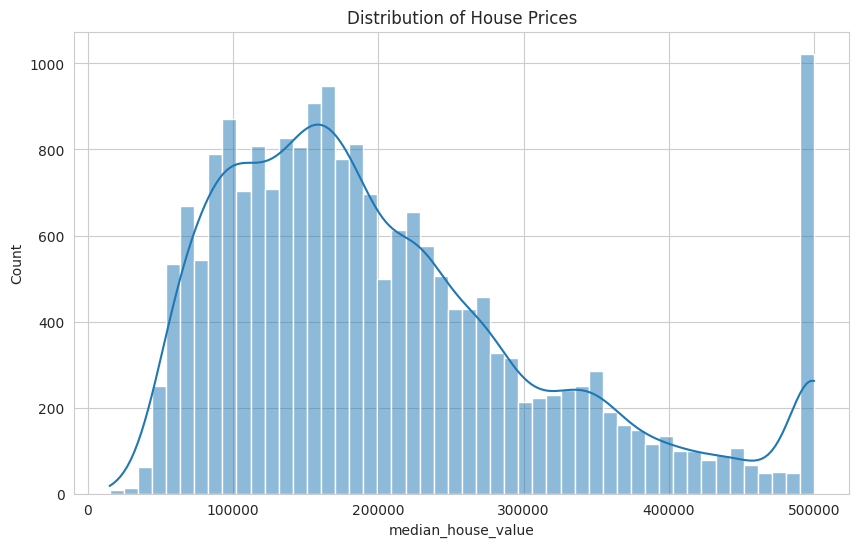

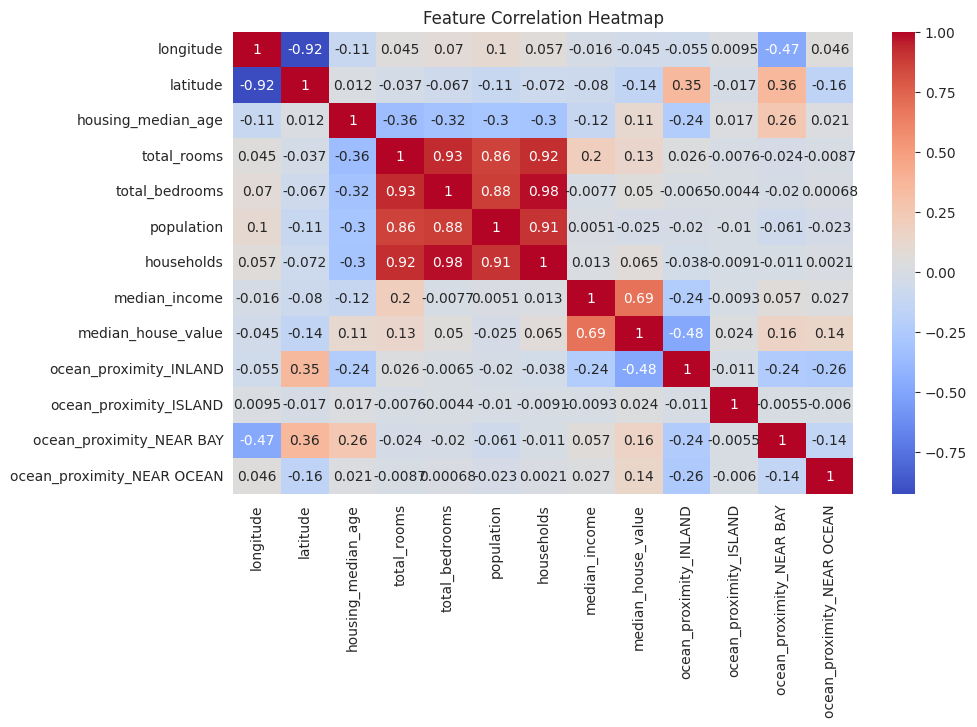

In [ ]:
# Plot distribution of house prices
plt.figure(figsize=(10,6))
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 4: Splitting Dataset
Divide the dataset into training and testing sets.

In [ ]:
# Splitting features and target variable
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Feature Scaling
Standardize the dataset for better model performance.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Train Machine Learning Models
Train **Linear Regression** and **Random Forest Regressor** models.

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Step 7: Model Evaluation
Compare model performance using **Mean Squared Error (MSE)** and **R² Score**.

In [ ]:
# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - MSE:", mse_lr, "R2 Score:", r2_lr)
print("Random Forest - MSE:", mse_rf, "R2 Score:", r2_rf)

Linear Regression - MSE: 4802173538.60416 R2 Score: 0.6488402154431994
Random Forest - MSE: 2378317289.567475 R2 Score: 0.8260851299316047


## Step 8: Model Selection & Saving
Choose the best-performing model and save it.

In [ ]:
# Model Comparison
if r2_rf > r2_lr:
    best_model = rf_model
    print("Random Forest performed better.")
else:
    best_model = lr_model
    print("Linear Regression performed better.")

# Save the best model
joblib.dump(best_model, "best_house_price_model.pkl")
print("Best model saved as best_house_price_model.pkl")


Random Forest performed better.
Best model saved as best_house_price_model.pkl


## Step 9: Visualizing Predictions
Plot actual vs predicted values.

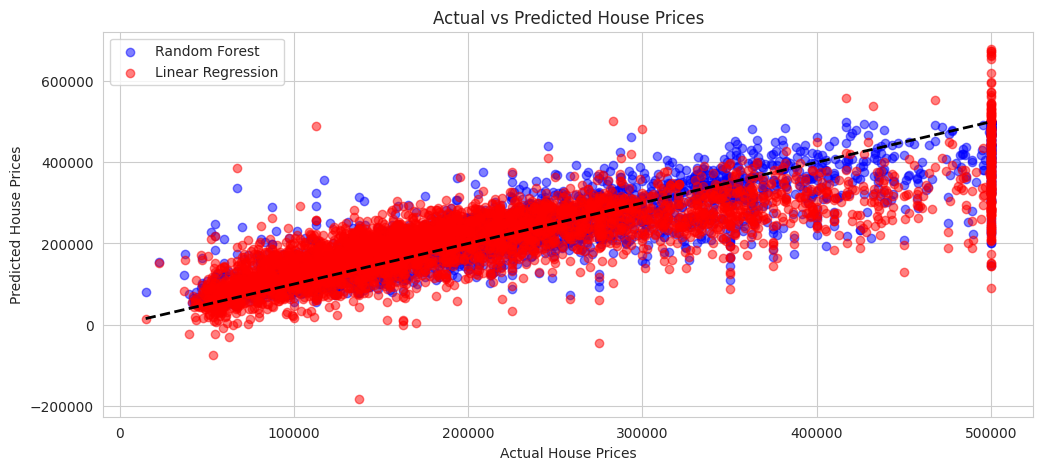

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='red', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
